# Inicialización de R

In [1]:
R.version.string

[1] "R version 4.0.5 (2021-03-31)"

## Instalación de paquetes

* `tidyverse` Metapaquete de todos los paquetes tidyverse 
* `caret` Contiene la funcion `confusionMatrix`
* `matlib` Contiene la función `inv` para la inversa de una matriz.

In [2]:
if("tidyverse" %in% rownames(installed.packages()) == FALSE) {install.packages("tidyverse")}
if("caret" %in% rownames(installed.packages()) == FALSE) {install.packages("caret")}
if("gmodels" %in% rownames(installed.packages()) == FALSE) {install.packages("gmodels")}
if("MASS" %in% rownames(installed.packages()) == FALSE) {install.packages("MASS")}

if("MVN" %in% rownames(installed.packages()) == FALSE) {install.packages("MVN")}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gsl’, ‘energy’


Warning message in install.packages("MVN"):
“installation of package ‘gsl’ had non-zero exit status”
Warning message in install.packages("MVN"):
“installation of package ‘energy’ had non-zero exit status”
Warning message in install.packages("MVN"):
“installation of package ‘MVN’ had non-zero exit status”


# Conjunto de Datos
En este ejercicio trabajamos con los datos de Iris que Ronald Fisher usó para introducir LDA. Están en R como `iris`.

## Contexto

El conjunto de datos de flores de Iris o el conjunto de datos de Fisher Iris es un conjunto de datos multivariado introducido por Sir Ronald Fisher en 1936 como un ejemplo de análisis discriminante.

## Contenido

El conjunto de datos consta de 50 muestras de cada una de las tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor), es decir, 150 muestras en total. De cada muestra se midieron cuatro características: el largo y el ancho de los sépalos y pétalos, en centímetros.

### Lectura y almacenamiento de datos


In [3]:
# 1. Lectura y almacenamiento de datos en data.frame
data <- iris
# 2. Observacion algunos registros.
head(data, 3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


### Etiquetas

In [4]:
library("tidyverse")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [5]:
labels <- unique(data$Species)
labels

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

### Elección de subconjunto
En este caso, solo usaremos las clases

* Virginica
* Versicolor

In [6]:
data <- filter(data, Species=="virginica"|Species=="versicolor")

head(data, 3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,7.0,3.2,4.7,1.4,versicolor
2,6.4,3.2,4.5,1.5,versicolor
3,6.9,3.1,4.9,1.5,versicolor


Obtenemos la cantidad de observaciones y la dimensión (Recordando que una pertenece a la etiqueta)

* $100$ Observaciones.
* $4$ Características más una perteneciente a la etiqueta.

In [7]:
N <- dim(data)[1]
d <- dim(data)[2]
print(c(N, d))

[1] 100   5


### Proporcion de clases

Notamos que las clases seleccionadas tienen 50% de proporcion del conjunto. 

Por lo anteior, la probabilidad a priori de las dos clases es $\frac{1}{2}$.

In [8]:
round(prop.table(table(data$Species)) * 100, 1)


    setosa versicolor  virginica 
         0         50         50 

## Visualización
Visualizamos las proyecciones sobre las componentes principales. Podemos notar que 

* Existe cierta separación de clases.
* Las estructuras de las nubes de puntos son similares, aunque tambien debemos tomar en cuenta que contamos con pocos datos.

In [9]:
# 1. Agregamos una nueva columna que asigna un color. Usaremos para graficar
data <- mutate(
    data, 
    color = fct_recode(
        as.character(data$Species),
        "red" = "virginica",
        "blue" = "versicolor" 
    )
)

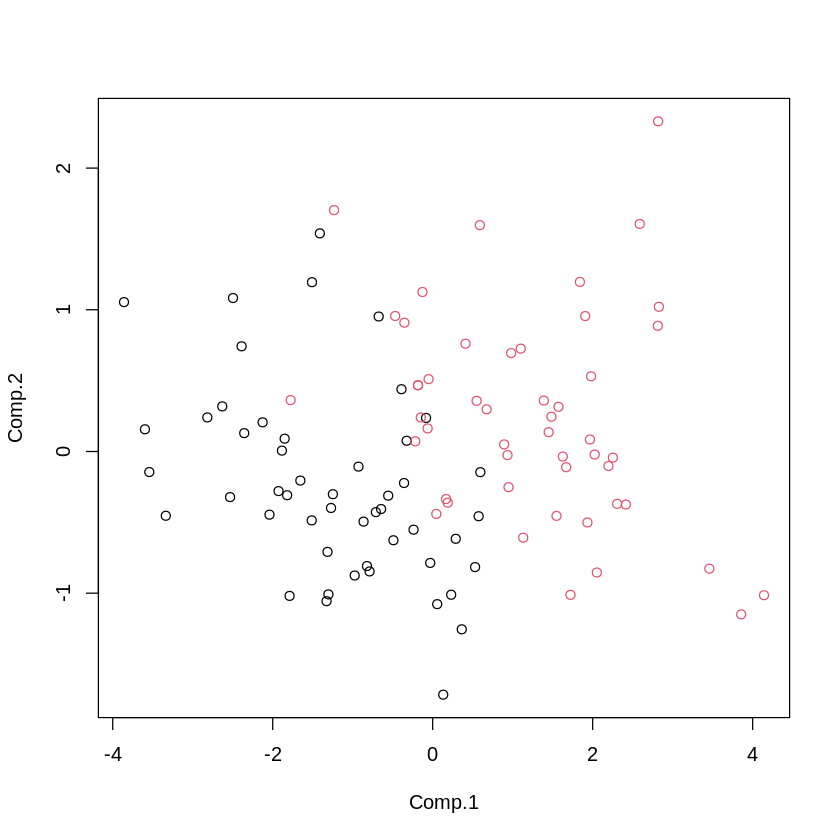

In [10]:
# 1. Calculo de componentes principales a partir de matriz de correlacion
#    Omitimos ademas la clase/especie (Columna 5)
pca <- princomp(data[,-c(5, 6)] , cor = TRUE)

plot(pca$scores[,1:2], xlim = range(pca$scores[,1]), ylim = range(pca$scores[,2]), col=data$color)

In [11]:
t(pca$loadings)

pca$scores[1,]
as.matrix(data[1, -c(5, 6)])
t(pca$loadings) %*% t(as.matrix(data[1, -c(5, 6)]) - pca$center)


Loadings:
       Sepal.Length Sepal.Width Petal.Length Petal.Width
Comp.1  0.507        0.435       0.544        0.508     
Comp.2  0.221       -0.888       0.380        0.134     
Comp.3  0.693                                -0.718     
Comp.4  0.462       -0.136      -0.748        0.456     

               Sepal.Length Sepal.Width Petal.Length Petal.Width
SS loadings            1.00        1.00         1.00        1.00
Proportion Var         0.25        0.25         0.25        0.25
Cumulative Var         0.25        0.50         0.75        1.00

Comp.1     Comp.2     Comp.3     Comp.4 
 0.5300016 -0.8158836  1.3046797  0.2724662

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,7,3.2,4.7,1.4


,1
Comp.1,0.2646120
Comp.2,-0.2437261
Comp.3,0.7320186
Comp.4,0.3249107


# LDA

Denotamos por $n_1$ la cantidad de elementos de la clase 1 en la muestra y por $n_2$ la cantidad de elementos de la clase 2. Buscamos una funcion lineal que 

* Separe lo más posible los centroides de la clase.
* Minimice la varianza de las clases proyectas. 

In [12]:
# 1. Separacion de clases
class_1 <- filter(data, Species == "versicolor")[, -c(5,6)]
class_2 <- filter(data, Species == "virginica")[, -c(5,6)]
overall_class <- data[,-c(6, 5)]
# 2. Guardamos la cantidad de datos de cada clase para calculos posteriores
n_1 <- nrow(class_1)
n_2 <- nrow(class_2)

## Centroides de clases

* Observamos los centroides (medias muestrales) de cada clase y los guardamos para su uso posterior. 
* También construimos la media muestral general.

In [13]:
mean_1 <- colMeans(class_1)
mean_2 <- colMeans(class_2)

mean_1
mean_2

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       5.936        2.770        4.260        1.326

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       6.588        2.974        5.552        2.026

In [14]:
overall_mean <- (mean_1 + mean_2) * 0.5 # colMeans(overall_class)
overall_mean

pca$center

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       6.262        2.872        4.906        1.676

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       6.262        2.872        4.906        1.676

Visualizamos las medias sobre las componentes principales. 

* Los puntos rellenos pertenecen a las medias muestrales de cada clase. 
* El triáángulo verde pertenece a la media muestral general.

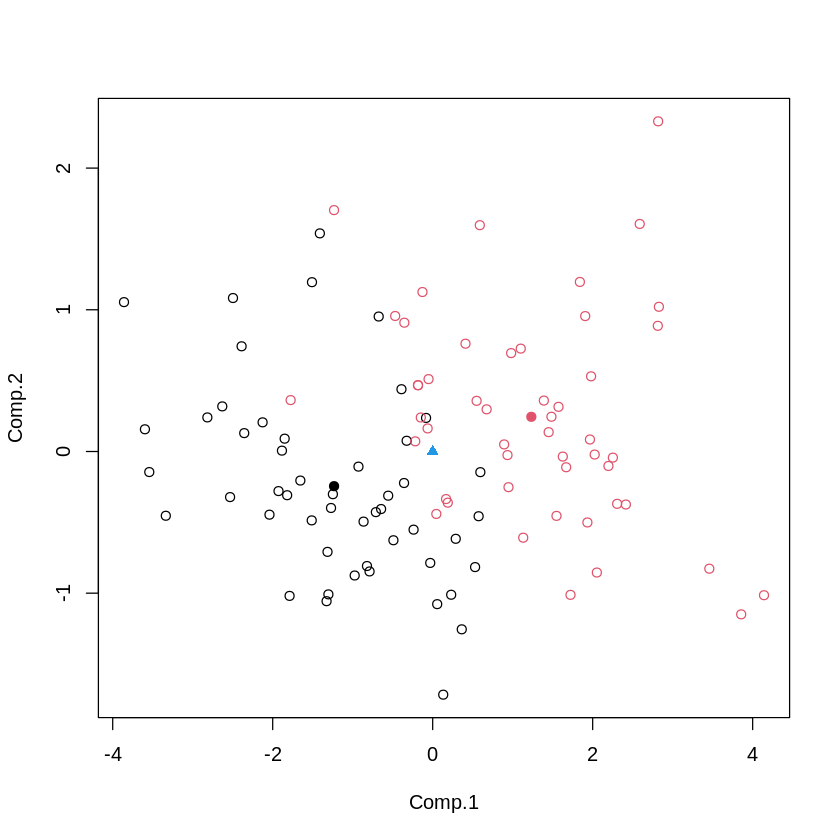

In [15]:
# 1. Para proyectar las medias muestrales, primero las centramos y reescalamos.
proyected_mean_1 <- t(t(pca$loadings) %*% 
    ((mean_1 - pca$center) / pca$scale ))[1:2] #Tomamos primeras dos componentes
proyected_mean_2 <- t(t(pca$loadings) %*% 
    ((mean_2 - pca$center) / pca$scale ))[1:2]#Tomamos primeras dos componentes
# 2. Mismo procedimiento para proyectar la media muestral general.
proyected_overall_mean <- t(t(pca$loadings) %*% 
    ((overall_mean - pca$center) / pca$scale ))[1:2]
# 3. Mostramos las observaciones sobre componentes principales
plot(
    pca$scores[,1:2], xlim = range(pca$scores[,1]), 
    ylim = range(pca$scores[,2]), col=data$color
)
# 4. Mostramos medias muestrales
points( c(proyected_mean_1[1]), c(proyected_mean_1[2]), col=1, pch=19)
points( c(proyected_mean_2[1]), c(proyected_mean_2[2]), col=2, pch=19)
# 5. Mostramos media muestral general
points(c(proyected_overall_mean[1]),c(proyected_overall_mean[2]),col=4,pch=17)

## Matrices de covarianza de clases

Suponemos que las matrices de covarianza son iguales, esto es $$\Sigma_1 = \Sigma_2 = \Sigma$$

Observamos __las estimaciones de las matrices de covarianza de cada clase__. Las denotamos como $$S_1, S_2$$

In [16]:
S_1 <- cov(class_1)
S_2 <- cov(class_2)
S_1
S_2

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.26643265,0.08518367,0.18289796,0.05577959
Sepal.Width,0.08518367,0.09846939,0.08265306,0.04120408
Petal.Length,0.18289796,0.08265306,0.22081633,0.07310204
Petal.Width,0.05577959,0.04120408,0.07310204,0.03910612


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.40434286,0.09376327,0.30328980,0.04909388
Sepal.Width,0.09376327,0.10400408,0.07137959,0.04762857
Petal.Length,0.30328980,0.07137959,0.30458776,0.04882449
Petal.Width,0.04909388,0.04762857,0.04882449,0.07543265


In [17]:
S_1 - S_2

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,-0.137910204,-0.008579592,-0.12039184,0.006685714
Sepal.Width,-0.008579592,-0.005534694,0.01127347,-0.006424490
Petal.Length,-0.120391837,0.011273469,-0.08377143,0.024277551
Petal.Width,0.006685714,-0.006424490,0.02427755,-0.036326531


Notemos que la matriz que se obtiene de la diferencia de ambas estimaciones de matrices de covarianza tiene valores de orden menor o igual a `1e-2` salvo por 3 valores que son del orden de `1e-1`. 

Debido a que contamos con pocos datos y los valores de las matrices son parecidos, vamos a suponer que las matrices de covarianza de ambas clases son iguales aunque se debe tomar en cuenta los resultados aquí obtenidos.  

Además, __Estimamos la matriz de covarianza__ basándonos en $$W = (n_1 - 1)S_1 + (n_2 - 1)S_2$$ donde $$W / (n_1 + n_ 2 - 2) = S$$ es la estimación de $\Sigma$ (Según el libro JohnsonMVA pag 623 eq. (11-61)  ). En clase, denotamos esta estimación $S$ de la matriz de covarianza como $S_W$.

In [18]:
W <- ((n_1 - 1)*S_1) + ((n_2 - 1) * S_2)

S_W <- W * (1 / (n_1 + n_2 - 2))
S_W

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.33538776,0.08947347,0.24309388,0.05243673
Sepal.Width,0.08947347,0.10123673,0.07701633,0.04441633
Petal.Length,0.24309388,0.07701633,0.26270204,0.06096327
Petal.Width,0.05243673,0.04441633,0.06096327,0.05726939


## LDA

Ahora que hemos supuesto que la matriz de covarianza es la misma para cada clase, nuestro problema de encontrar la función lineal se convierte en encontrar la dirección de proyeccion $l$ que maximiza 

$$\frac{l^{T} S_{B} l}{l^{T} S_{W} l }$$

donde $S_{W}$ es la esimación de la matriz de covarianza de ambas clases y $$S_{B} = (c_{+} - c_{-})(c_{+} - c_{-})^{T}$$ es el vector que une ambos centroides (estimaciones de las medias de cada clase) $c_{+}$ y $c_{-}$. En el problema 1 de la tarea vimos que, usando la desigualdad Cauchy-Schwartz, encontramos esta dirección que está dada por $$l = S_{W}^{-1}(c_{+} - c_{-})$$ 


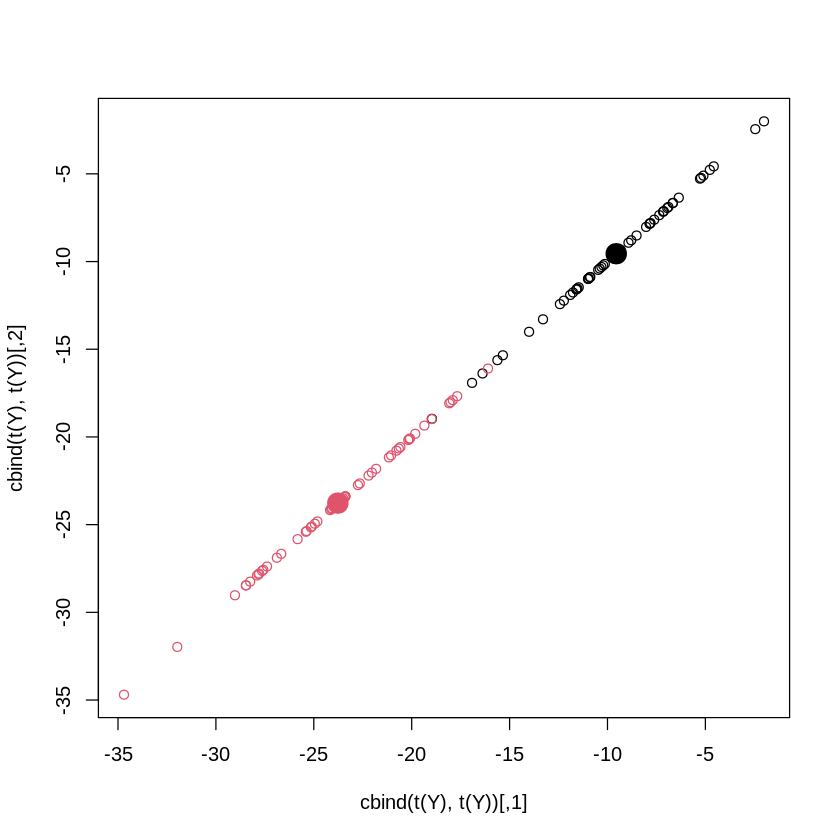

In [19]:
# 1. Encontramos la direccion l usando el resultado anterior
l <- solve(S_W) %*% (mean_1 - mean_2)
# 2. Proyectamos los datos sobre la direccion l
Y <- t(l) %*% t(as.matrix(overall_class))
# 3. Mostramos la proyeccion
plot(cbind(t(Y), t(Y)), xlim = range(Y), ylim = range(Y), col=data$color)
points( 
    c(t(l) %*% as.matrix(mean_1)), 
    c(t(l) %*% as.matrix(mean_1)), 
    col=1, pch=19, lwd = 10
)
points( 
    c(t(l) %*% as.matrix(mean_2)), 
    c(t(l) %*% as.matrix(mean_2)), 
    col=2, pch=19, lwd = 10
)

* En la grafica se muestran los puntos $(l^{T}x_i,l^{T}x_i)$ para una primera visualización. Podemos notar que los datos se separan casi por completo. 

* Por otro lado, podemos observar las proyecciones de las medias muestrales de cada clase, $$l^{T}c_{+}, l^{T}c_{-}$$ en la gráfica son los puntos de mayor tamaño. Observando sus valores numéricos notamos una diferencia de aproximadamente $14.21cm$. 

In [20]:
# 1. Observamos las proyecciones de las medias muestrales de cada clase
as.numeric(t(l) %*% as.matrix(mean_1))
as.numeric(t(l) %*% as.matrix(mean_2))
# 2. Calculamos distancias entre medias
as.numeric(t(l) %*% as.matrix(mean_1)) - as.numeric(t(l) %*% as.matrix(mean_2))

[1] -9.553643

[1] -23.77253

[1] 14.21889

* Luego, calculamos la variabilidad por clase, esto es $$l^{T} S_{W} l $$

In [21]:
as.numeric( ( t(as.matrix(l)) %*% as.matrix(S_W)) %*% as.matrix(l) )

[1] 14.21889

## Clasificador

Ahora bien, nos proponemos construir un clasificador. Una opción es usar un punto de corte para obtener una función de la forma $$L(x) = l^{T}x + b_0$$ donde $l = S_W^{-1}(c_{+} - c_{-})$, y hacer la clasificación comparando $L(x)$ con 0. 

Si suponemos gaussianidad, este valor $b_0$ está dado por $$b_0 = -\frac{1}{2}\left[ \mu_1^{T}\Sigma^{-1}\mu_1 - \mu_2^{T}\Sigma^{-1}\mu_2 \right] + \log_e(\pi_2 / \pi_1)$$ $$=-\frac{1}{2}\left[ \mu_1^{T}\Sigma^{-1}\mu_1 - \mu_2^{T}\Sigma^{-1}\mu_2 \right]$$
donde $\pi_i$ son las probabilidades a priori de cada clase (en este caso ambas son $\frac{1}{2}$), $\mu_1$ y $\mu_2$ son las medias teóricas y $\Sigma$ la matriz de covarianza de ambas clases (Según Izenman pag. 243 eq. (8.13)). 

### Prueba de Gaussianidad
Haciendo uso de la librería `MVN` podemos verificar la gaussianidad (o falta de esta) de los datos.

In [22]:
#library("MVN")
#royston_test <- mvn(data = overall_class, mvnTest = "royston", multivariatePlot = "qq")
#royston_test$multivariateNormality

### Clasificador suponiendo gaussianidad

In [23]:
b_0 <- -0.5 * ( ((t(mean_1) %*% solve(S_W)) %*% mean_1) - ((t(mean_2) %*% solve(S_W)) %*% mean_2) )

In [24]:
# Construimos clasificador lineal de la forma Ind(L(x) > 0)
L <- function(x){
    if ( t(as.matrix(l)) %*% t(as.matrix(x)) + b_0 > 0 ) {return (2)}
    return (1)
}

In [25]:
library("caret")

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [26]:
# Clasificamos
Y_predicted <- c()
for(i in 1:N){
    Y_predicted <- c(Y_predicted, L(overall_class[i,]))
}

Y_predicted <- fct_recode(
    as.character(Y_predicted),
    "virginica" = "1",
    "versicolor" = "2"
)

matrix <- confusionMatrix(data = Y_predicted, reference = data$Species)

matrix$overall["Accuracy"]
matrix$overall
matrix$table

Warning message in levels(reference) != levels(data):
“longer object length is not a multiple of shorter object length”
Warning message in confusionMatrix.default(data = Y_predicted, reference = data$Species):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Accuracy 
    0.97

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  9.700000e-01   9.400000e-01   9.148239e-01   9.937700e-01   5.000000e-01 
AccuracyPValue  McnemarPValue 
  1.315433e-25            NaN

            Reference
Prediction   setosa versicolor virginica
  setosa          0          0         0
  versicolor      0         48         1
  virginica       0          2        49

Notamos que nuestro clasificador logra un porcentaje de clasificación correcta de 97%. 

Otra posible idea de clasificador es asignar la clasificación a la clase que minimice el error cuadrático respecto a las medias, de esta forma, ya no es necesario suponer normalidad en los datos, sin embargo, la función ahora no será de la forma $L(x) > 0$. 

# Conclusiones

* Podemos notar que los resultados obtenidos con LDA son buenos, pues podemos apreciar que casi logra separar por completo las clases.
* Una vez que encontramos la tranformación lineal que logra una mejor discriminación de clases, es posible construir un clasificador, por ejemplo asignando a la clase del centroide más cercano, o contruyendo un umbral, en este caso elegimos suponer gaussianidad y encontrar el punto de corte.
* Suponiendo gaussianidad podemos contruir un clasificador que logra una precisión de 97% en el conjunto (de entrenamiento) de datos.